### Laplacian Filter

In [0]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('Fig3.40(a).jpg',0)

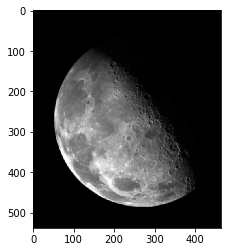

In [7]:
plt.imshow(img,cmap='gray')

In [8]:
print(img, " shape =", img.shape , " size =", img.size)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]  shape = (538, 464)  size = 249632


### Define a kernel

In [9]:
kernel = np.array(([0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]),np.float32)
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [0]:
img_h = img.shape[0]
img_w = img.shape[1]
ker_h = kernel.shape[0]
ker_w = kernel.shape[1]

### Zero Pad the input image

In [0]:
pad = (ker_h-1)//2
img_padded = np.pad(img,pad)

### Define a blank output image 

In [23]:
img_out = np.zeros((img_h,img_w))
img_out.shape

(538, 464)

### Correlation

In [0]:
img_padded_h = img_padded.shape[0]
img_padded_w = img_padded.shape[1]
for i in np.arange(pad, img_padded_h - pad):
    for j in np.arange(pad, img_padded_w - pad):
        mask = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
        sum = np.sum(mask * kernel)
        img_out[i - pad, j - pad] = sum

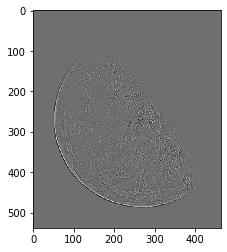

In [14]:
plt.imshow(img_out,cmap='gray')

### Substract output from original image

In [0]:
img_out_sharp = img + img_out
img_out_sharp = (img_out_sharp/img_out_sharp.size)*255

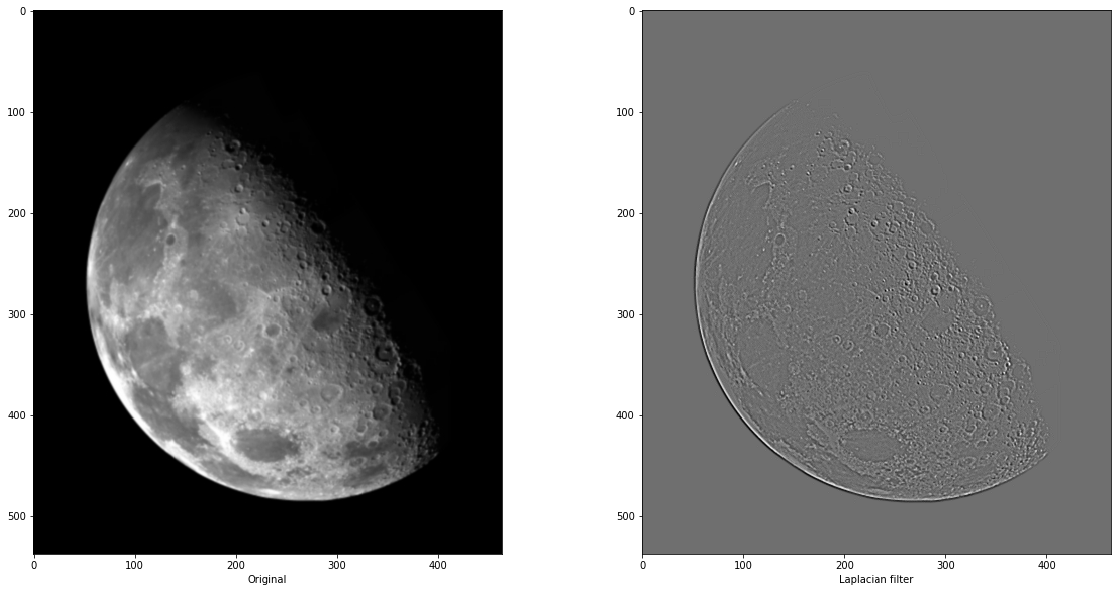

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xlabel('Original')

plt.subplot(1,2,2)
plt.imshow(img_out,cmap='gray')
plt.xlabel('Laplacian filter')

plt.show()

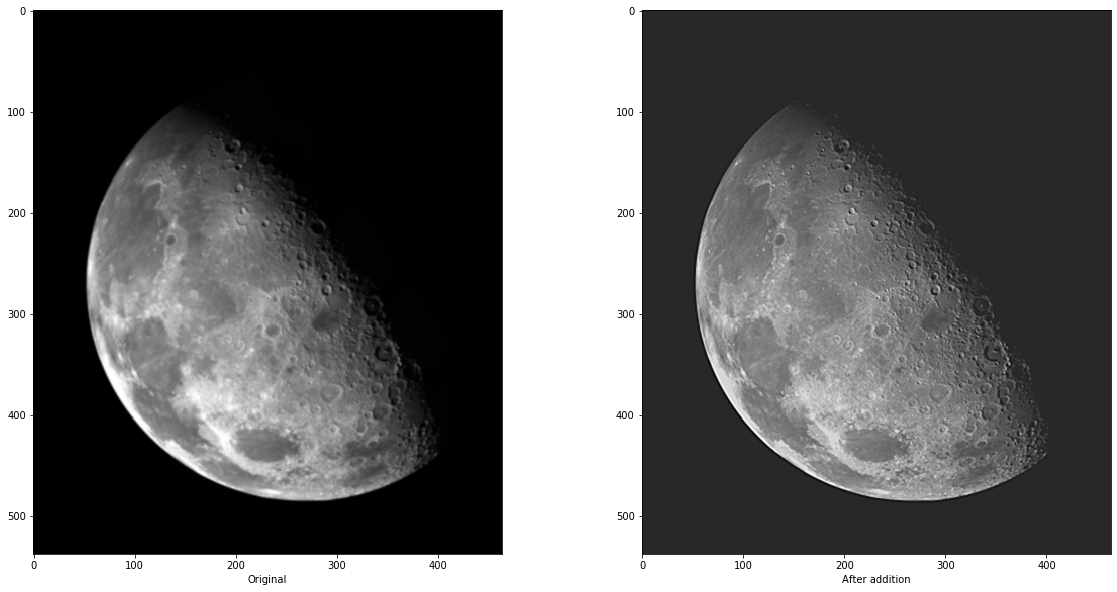

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xlabel('Original')

plt.subplot(1,2,2)
plt.imshow(img_out_sharp,cmap='gray')
plt.xlabel('After addition')

plt.show()